# The Midpoint and Runge-Kutta Methods

## 0. Importing required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Midpoint

If we have a differential equation in the following form, <br>
$$
\frac{dy(t)}{dt} = f(t,y(t)),
$$
<br>
the midpoint method is given by:
$$
y_{n+1} = y_n + h f(t_n + h/2 , y_n + h/2 f(t_n,y_n) ).
$$ <br><br>
However, the **midpoint** method is quivalent to the **Runge-Kutta $2^{nd}$ order**. We will see Runge-Kutta method in the next section. <br>
Lets see how the midpoint works on the $ y(t) = Ce^{kt} $ with $C = 1$ and $k=0.5$. <br>
This means we have: <br><br>
$$
y'(t) = f(t,y(t)) = Cke^{kt} \Rightarrow y'(t) = k y(t).
$$ <br>

In [3]:
'''Defining the parameters'''
C = 1
k = 2
def fn (t):
    return C*k*np.exp(k*t)
t_0 = 0
t_f = 1
N = 1000
h = (t_f-t_0)/N
y = np.empty(N)
y[0] = C # The initial condition! based on our function
t = np.zeros(N)
for i in range(N-1):
    to = t[i]
    yo = y[i]
    th = to + 0.5 * h
    yh = yo + 0.5 * h * fn(to)

    tp = to + h
    yp = 2.0 * yh - yo

    t[i+1] = tp
    y[i+1] = yp


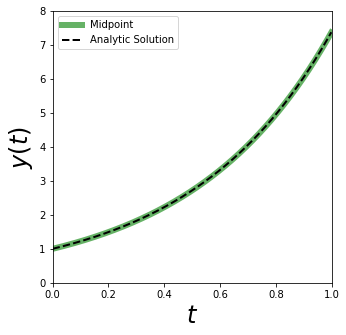

In [4]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(t,y, lw=6, label="Midpoint", alpha=0.6, color='g')
ax.plot(t, C*np.exp(k*t), label="Analytic Solution", linestyle="dashed", lw = 2, color='k')
ax.set_xlim(0,1)
ax.set_ylim(0,8)
ax.set_xlabel('$t$', fontsize=24)
ax.set_ylabel('$y(t)$', fontsize=24)
ax.legend()

## 2. The Runge-Kutta

In the $4^{th}$ **Runge-Kutta** method for solving a ODE problem, the $y_{n+1}$ is determined as follows: <br><br>
$$
K_1=h f(t_n,y_n),
$$
$$
K_2=h f(t_n + \frac{h}{2},y_n + \frac{K_1}{2}),
$$
$$
K_3=h f(t_n + \frac{h}{2},y_n + \frac{K_2}{2}),
$$
$$
K_4=h f(t_n + h,y_n + K_3),
$$
<br>
$$
y_{n+1}=y_n + \frac{K_1}{6} + \frac{K_2}{3} + \frac{K_3}{3} + \frac{K_4}{6} + O(h^5).
$$

Now lets see how this method works in practice. Assuming we have a differential equation,
$$
\frac{dy}{dt} = \frac{1}{2}(t-y).
$$<br>
This means that $f(t,h) = \frac{1}{2}(t-y)$. All we need to do is implementing above definitions to our specific $f(t,y)$.

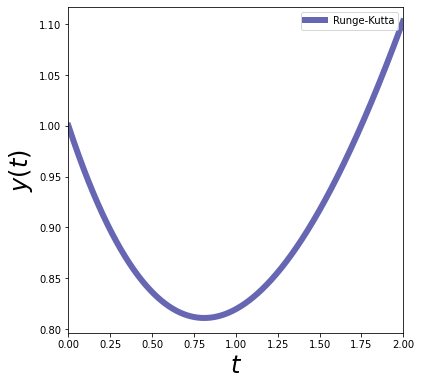

In [17]:
t_0 = 0
t_f = 2
N = 1000
h = (t_f-t_0)/N

y = np.empty(N)
t = np.empty(N)
'''Initial conditions'''
t[0] = t_0
y[0] = 1

def F_t_h(t,y):
    return 0.5*(t-y)


for i in range(0,N-1):
    K1 = h*F_t_h(t[i],y[i])
    K2 = h*F_t_h(t[i] + 0.5*h,y[i]+0.5*K1)
    K3 = h*F_t_h(t[i] + 0.5*h,y[i]+0.5*K2)
    K4 = h*F_t_h(t[i] + h,y[i]+ K3)
    y[i+1] = y[i] + (K1+2*K2+2*K3+K4)/6.0
    t[i+1] = t[i] + h
    
fig2, ax2 = plt.subplots(1,1,figsize=(6,6))
ax2.plot(t,y, lw=6, label="Runge-Kutta", alpha=0.6, color='navy')
ax2.set_xlim(t_0,t_f)
ax2.set_xlabel('$t$', fontsize=24)
ax2.set_ylabel('$y(t)$', fontsize=24)
ax2.legend()